<a href="https://colab.research.google.com/github/AleOi/PCS3438Eduardo/blob/master/Lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercícios Inteligência Artificial

In [94]:
import pandas as pd
import matplotlib.pyplot  as plt
import os 
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Leitura dos arquivos entregues
class01 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PCS/Classificador/class01.csv')
class02 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PCS/Classificador/class02.csv')

reg01 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PCS/Classificador/reg01.csv')
reg02 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PCS/Classificador/reg02.csv')

In [96]:
class01 = class01.dropna()
class01.isna().sum()
class01.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,target
0,1.162990,-0.831971,-0.185266,0.441240,0.033957,1.432988,-1.171483,0.203248,1.900889,1.119174,-1.588227,-2.073093,-1.294932,0.469596,-0.917616,-0.126988,0.137758,-0.469286,-1.606459,-1.042775,0.047064,0.187069,0.476188,1.592225,2.086264,-1.399343,-0.281023,0.165615,1.734503,1.404131,-0.225348,-0.153081,-1.328352,0.448647,1.601800,-0.868831,-1.955086,-1.852104,1.635048,-0.488308,...,-0.361434,0.731615,0.100763,0.191994,-1.394590,1.804411,-0.277156,0.706025,1.709763,-0.177986,1.820904,-0.441378,1.458885,-1.718135,1.491943,-0.711639,-0.393236,1.420271,-1.973110,0.181478,0.311390,-0.322522,0.923033,0.715609,1.052723,0.798648,0.594509,0.766456,-1.127342,-1.130117,-1.139286,-0.608239,-0.107224,1.700972,-0.698151,0.520004,-0.450784,-0.187694,-0.538329,1.0
1,-1.750976,-0.516614,-0.761588,1.692347,-1.579436,0.581782,-0.950953,0.381426,-1.370027,0.943387,1.065376,-0.704799,1.227274,-0.703710,0.339356,0.695932,-0.339311,1.109685,-1.223220,-1.026081,-1.389920,-0.074927,-0.604064,0.882286,-0.358079,0.578929,0.820298,1.255350,0.209356,1.202590,0.283053,-0.177492,1.540441,-0.413630,-1.414556,-0.258046,-2.703348,-1.713417,0.663546,1.424628,...,-0.817892,-1.354557,0.019600,1.551245,-0.529234,-0.108139,0.314700,0.090206,-2.674567,0.144326,0.466348,-0.041337,-1.210161,0.022796,1.268583,-0.880157,-0.369319,-0.348157,-0.893968,0.460042,0.145427,-0.368619,0.397397,0.082442,-0.702597,-0.016223,-1.023253,0.391209,-0.833376,1.119688,-0.280502,-0.306014,0.554926,-1.402866,-0.776478,1.181890,-0.066449,-0.802430,1.587229,0.0
2,0.304635,0.972369,0.202908,-0.607761,0.487088,0.205173,0.815216,0.491880,0.904705,1.167017,-0.898315,-1.005882,-1.629758,0.827980,-0.800867,-0.090847,-1.505064,-0.749181,-0.747328,-0.924978,-0.883258,0.995797,0.612665,-1.466707,-0.613421,-0.475304,-0.117350,-0.045212,0.323532,0.904850,0.140093,-1.083813,1.464877,2.119372,-0.303626,0.410901,-1.790323,-1.903114,-1.153988,-2.819337,...,0.904272,0.161712,-0.575007,-1.057299,-0.073783,0.057194,0.241203,1.289701,0.261092,-1.069399,1.104484,-0.436724,0.555385,-0.310986,-0.494078,-1.588380,-1.043310,-0.139221,-0.620912,-0.806472,-1.689724,-0.105294,0.562617,-0.722677,-1.055780,-0.864613,-2.870269,-1.643873,-1.179760,0.580494,-0.134901,0.291496,-1.038477,1.297057,-1.296614,-1.109806,-0.003495,-0.149940,0.539892,8.0
3,-1.667576,-0.262639,-1.513473,-1.060125,-0.456209,1.782235,1.034366,0.115217,-0.182177,-1.007720,0.638389,1.362196,0.022783,-0.685154,0.209500,1.272829,0.021446,-2.377806,0.911686,-0.801052,1.536903,0.108070,2.242202,-0.378396,-0.589782,1.710315,-0.427522,0.281905,-1.277258,-2.125018,1.447899,-0.433264,-0.279732,2.992868,2.167607,0.092811,-0.159702,2.367673,-0.286235,-0.078080,...,0.455707,2.996660,1.092758,-1.394223,1.867079,0.107877,-0.111674,1.366965,-1.156829,1.016703,-1.250342,-0.047491,-0.733716,0.147792,2.664895,1.297595,1.770718,0.176868,2.833215,0.791423,-0.304989,-0.326547,0.670254,-0.959954,-0.130716,-0.193906,-0.475651,-0.628208,1.062940,2.236321,1.203067,0.082647,-1.625862,-0.154116,0.478483,-1.465050,-0.450510,-0.757631,-3.184493,7.0
4,-0.820670,0.390631,0.761628,-0.945407,-0.871003,-0.142293,-1.522004,0.141962,0.091094,-0.860818,0.336518,2.144426,-1.489244,0.528145,-1.494986,1.009409,-0.006427,0.846471,0.746058,-0.837489,-0.248354,0.181324,-1.561889,-1.155290,0.679707,0.226230,1.123761,0.942101,-0.609287,-0.649239,1.675202,-0.205976,-0.032441,-1.964611,-1.813224,-0.350366,-0.710835,1.890456,0.611949,-1.527161,...,0.267687,-2.433476,0.656596,1.290886,1.219272,0.548166,0.592994,-2.123704,-0.252731,1.068796,-0.172782,0.491352,0.558901,0.824619,0.070099,0.454410,1.302307,1.533845,-0.048775,1.593953,-1.281156,0.867191,0.846072,2.208059,-0.751534,-1.002778

In [97]:
class02 = class02.dropna()
class02.isna().sum()
class02.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,target
0,1.753916,-1.283809,-0.474435,-0.328502,1.162749,1.110096,-0.532774,1.041946,0.393644,1.508894,0.956792,1.023539,-0.137800,2.214334,-1.296403,0.289973,-0.534358,-0.281042,0.694730,-1.433266,0.924982,-2.057181,-0.549137,-3.173450,0.586501,-0.706655,-0.297165,1.795291,0.062454,-0.042865,2.245995,-1.095494,2.204000,-0.440801,0.707914,-0.523884,-0.169131,0.589126,0.466606,1.287092,...,1.128348,-0.108137,-1.491954,0.278087,-0.054600,-0.929214,-0.819471,1.139206,0.256272,1.427582,0.784542,-1.372444,0.410666,-1.714139,1.556985,-0.308711,0.495791,1.794847,-0.895207,-0.994384,1.327057,0.459514,-0.427028,-1.233423,-0.082867,0.581093,-0.454965,2.219944,-0.072620,-2.287802,-0.102623,0.233644,-1.711628,0.816312,2.700492,2.813359,0.343391,0.348734,-0.269752,5.0
1,0.579139,0.499696,1.848421,-2.037663,-0.490755,-0.874975,0.988246,0.117195,0.641343,1.041325,2.514416,-0.966310,0.723605,-0.237724,-1.145875,-1.143398,1.537323,-0.507353,-1.527909,-1.383423,-3.599264,-0.417618,0.793435,0.664672,1.328668,-0.253822,0.275177,1.320632,-0.350089,0.152109,-0.170316,0.962561,0.800814,1.080822,-0.669889,0.095474,0.765246,-1.030141,-0.865402,-0.918497,...,1.270459,-0.835900,1.135965,1.541132,0.335459,3.522019,-0.575595,1.455745,-1.712510,-0.444560,1.623487,-1.821844,0.417283,1.865907,-0.179140,0.041672,-0.028276,-0.923823,-0.325696,0.554558,-1.464702,-0.387375,-1.835147,2.519814,-0.737866,-0.159468,0.520113,0.418688,2.288341,-1.049899,-0.113718,0.918633,1.212413,2.534996,-1.694515,-2.519081,0.531062,-0.429925,-1.033625,2.0
2,3.455631,-0.843593,-1.180263,-1.388971,-0.763881,-0.809791,-0.225052,0.818787,1.021153,-0.486736,3.992756,-2.133250,0.891583,0.332780,-0.961519,-0.526913,-1.881099,0.169462,-2.213566,0.163718,-4.287368,-1.020370,-0.003437,2.015521,-1.008393,0.235220,-0.439532,1.065714,0.413584,-0.685649,-0.527322,2.825146,0.566295,0.229834,1.134402,-0.909729,1.897212,1.912073,0.104404,-1.962773,...,-0.062775,-0.643753,0.319763,1.532044,-0.664474,3.284353,-0.481290,0.575027,-0.351906,-1.124919,-0.886281,-1.796409,0.900915,-1.717920,0.163230,1.047541,0.427204,-1.064218,-0.892927,1.112621,-2.524762,-0.040242,0.544495,2.442321,-0.415876,-0.206329,0.634732,0.427337,-0.731540,-1.526304,-0.812184,-0.677958,2.545184,2.228583,-1.911287,-3.965635,1.293003,0.196379,-0.739823,3.0
3,2.917033,-1.369227,1.312688,-0.445185,0.218093,1.990030,-1.176665,-0.116772,1.242437,0.100773,1.221274,1.375699,1.696890,0.406938,-0.097485,-0.142421,1.760831,0.478847,-0.230930,-0.125576,1.315923,-0.906928,-1.657223,1.009584,-1.206683,1.054892,0.203510,0.509179,-0.177357,-0.257389,-0.210304,0.315964,0.587393,-0.681740,0.709137,0.295113,0.018490,0.426631,-0.544736,-0.822850,...,-0.900317,0.326159,-0.458899,0.890382,0.463224,0.270883,0.683692,-0.431721,1.250708,0.735862,1.181001,0.343974,0.405481,-0.387151,-1.943443,-0.996752,0.018280,1.183023,-0.439554,-2.161361,0.644289,-0.256695,0.944042,0.356357,-0.422929,0.615119,0.113898,2.515931,-0.065199,-0.910900,-1.691702,-1.903862,-0.437867,-0.542272,1.104584,-1.132434,0.580519,0.953035,1.643271,0.0
4,1.565296,-0.072016,1.263672,0.926946,-1.769547,0.745731,0.977034,3.002904,1.847178,-1.132675,5.657251,-1.529901,0.142956,3.628798,0.863605,0.449464,-0.949006,-1.962051,-1.816032,0.047115,-1.770501,-3.866679,-2.057564,-0.172702,0.357373,0.515891,-0.181291,1.910674,-0.067265,0.085993,-2.268619,3.567880,1.132262,-0.794039,0.017886,0.224814,0.264215,0.288429,2.324044,-1.454801,...,0.243162,-0.632721,0.171207,0.451211,0.048217,0.160105,-1.293734,1.056135,0.718408,0.140930,-0.683083,-2.343045,0.870594,0.421212,-0.022187,-1.267179,0.910749,1.352392,1.477646,-1.038514,-0.982994,-1.085098,-0.267247,0.043657,0.526728,1.801545,-0.601135,3.579368

In [98]:
reg01 = reg01.dropna()
reg01.isna().sum()
reg01.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,target
0,-0.640731,0.677929,-0.285153,0.469127,1.629361,-0.407575,0.677929,0.781634,-0.132065,-0.125852,238.342700
1,-1.257229,0.199883,0.369755,0.905828,2.199284,0.407064,0.199883,-0.276165,0.136314,-0.835977,30.823609
2,-1.351330,-0.159821,-0.667650,-0.067187,1.309160,-0.702359,-0.159821,-0.133427,-0.683428,-1.016574,-135.707090
3,-2.432787,-0.996849,-0.704290,-0.750186,1.066865,-0.082292,-0.996849,-1.860141,-1.151661,-1.850721,-579.983211
4,-1.475213,-0.318454,-0.682221,-0.151922,1.148624,-0.583869,-0.318454,-0.621999,-0.619677,-1.134553,-250.729762


In [99]:
reg02 = reg02.dropna()
reg02.isna().sum()
reg02.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,target
0,-0.640731,0.677929,-0.285153,0.469127,1.629361,-0.407575,0.677929,0.781634,-0.132065,-0.125852,-0.407575,0.469127,0.976612,-0.237673,0.270627,-0.146189,0.976612,2.370730,0.783461,0.783461,238.342700
1,-1.257229,0.199883,0.369755,0.905828,2.199284,0.407064,0.199883,-0.276165,0.136314,-0.835977,0.407064,0.905828,1.523959,-0.376705,0.811498,0.053166,1.523959,1.807168,-0.095143,-0.095143,30.823609
2,-1.351330,-0.159821,-0.667650,-0.067187,1.309160,-0.702359,-0.159821,-0.133427,-0.683428,-1.016574,-0.702359,-0.067187,0.592357,-0.700500,-0.221701,-0.683485,0.592357,1.456616,-0.464433,-0.464433,-135.707090
3,-2.432787,-0.996849,-0.704290,-0.750186,1.066865,-0.082292,-0.996849,-1.860141,-1.151661,-1.850721,-0.082292,-0.750186,0.159958,-1.482334,0.538354,-1.391746,0.159958,0.603398,-1.372567,-1.372567,-579.983211
4,-1.475213,-0.318454,-0.682221,-0.151922,1.148624,-0.583869,-0.318454,-0.621999,-0.619677,-1.134553,-0.583869,-0.151922,0.578886,-0.932404,-0.025521,-0.436129,0.578886,1.341985,-0.803744,-0.803744,-250.729762


# Split em Treino e Teste

In [0]:
from sklearn.model_selection import train_test_split
import time
# Atributos
class01Att = class01.iloc[:, 0:class01.columns.size - 1]
# Target
class01Res = class01.iloc[:, class01.columns.size - 1]

X_train, X_test, Y_train, Y_test = train_test_split(class01Att, class01Res, test_size=0.65, random_state=int(time.time()))


# Dimensões das Classes
XTreino/XTeste -> Atributos

YTreino/YTeste -> Target

In [101]:
class01Res.shape

(1000,)

In [102]:
class01Att.shape

(1000, 100)

In [103]:
X_train.shape

(350, 100)

In [104]:
X_test.shape

(650, 100)

In [105]:
Y_train.shape

(350,)

In [106]:
Y_test.shape

(650,)

#Naive Bayes - Questão *1*

Considerando os dados presentes no arquivo01.csv, treine o algoritmo Naive Bayes Gaussiano utilizando a netodologia de validação cruzada houdout (utilize para treino as 350 primeiras linhas e para validação as demais). Qual o valor da acurácia a base de treino? Qual o valor da acurácia a base de validação?

In [107]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
# Train
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)    # Testando os valores de teste
y_pred2 = gnb.predict(X_train)  # Testando os valores de treino

# Acurácia em relação aos dados de teste (validacao)
print("Numero de acertos do total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (Y_test == y_pred).sum(),
          100*(Y_test == y_pred).sum()/X_test.shape[0]
))

# Acurácia em relação aos dados de treino
print("Numero de acertos do total {} points : {}, performance {:05.2f}%"
      .format(
          X_train.shape[0],
          (Y_train == y_pred2).sum(),
          100*(Y_train == y_pred2).sum()/X_train.shape[0]
))

Numero de acertos do total 650 points : 386, performance 59.38%
Numero de acertos do total 350 points : 279, performance 79.71%


In [108]:
X_train['x0']

621    0.415841
389   -0.616446
699   -0.031395
706   -0.701015
32    -0.406195
         ...   
776    0.722675
605    0.942631
856    1.059427
237   -0.429344
234    0.791497
Name: x0, Length: 350, dtype: float64

In [109]:
class02.iloc[:, 0:class02.columns.size - 1].reset_index().sort_values(by = 'index')

,index,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,...,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0,1.753916,-1.283809,-0.474435,-0.328502,1.162749,1.110096,-0.532774,1.041946,0.393644,1.508894,0.956792,1.023539,-0.137800,2.214334,-1.296403,0.289973,-0.534358,-0.281042,0.694730,-1.433266,0.924982,-2.057181,-0.549137,-3.173450,0.586501,-0.706655,-0.297165,1.795291,0.062454,-0.042865,2.245995,-1.095494,2.204000,-0.440801,0.707914,-0.523884,-0.169131,0.589126,0.466606,...,0.276146,1.128348,-0.108137,-1.491954,0.278087,-0.054600,-0.929214,-0.819471,1.139206,0.256272,1.427582,0.784542,-1.372444,0.410666,-1.714139,1.556985,-0.308711,0.495791,1.794847,-0.895207,-0.994384,1.327057,0.459514,-0.427028,-1.233423,-0.082867,0.581093,-0.454965,2.219944,-0.072620,-2.287802,-0.102623,0.233644,-1.711628,0.816312,2.700492,2.813359,0.343391,0.348734,-0.269752
1,1,0.579139,0.499696,1.848421,-2.037663,-0.490755,-0.874975,0.988246,0.117195,0.641343,1.041325,2.514416,-0.966310,0.723605,-0.237724,-1.145875,-1.143398,1.537323,-0.507353,-1.527909,-1.383423,-3.599264,-0.417618,0.793435,0.664672,1.328668,-0.253822,0.275177,1.320632,-0.350089,0.152109,-0.170316,0.962561,0.800814,1.080822,-0.669889,0.095474,0.765246,-1.030141,-0.865402,...,-0.454398,1.270459,-0.835900,1.135965,1.541132,0.335459,3.522019,-0.575595,1.455745,-1.712510,-0.444560,1.623487,-1.821844,0.417283,1.865907,-0.179140,0.041672,-0.028276,-0.923823,-0.325696,0.554558,-1.464702,-0.387375,-1.835147,2.519814,-0.737866,-0.159468,0.520113,0.418688,2.288341,-1.049899,-0.113718,0.918633,1.212413,2.534996,-1.694515,-2.519081,0.531062,-0.429925,-1.033625
2,2,3.455631,-0.843593,-1.180263,-1.388971,-0.763881,-0.809791,-0.225052,0.818787,1.021153,-0.486736,3.992756,-2.133250,0.891583,0.332780,-0.961519,-0.526913,-1.881099,0.169462,-2.213566,0.163718,-4.287368,-1.020370,-0.003437,2.015521,-1.008393,0.235220,-0.439532,1.065714,0.413584,-0.685649,-0.527322,2.825146,0.566295,0.229834,1.134402,-0.909729,1.897212,1.912073,0.104404,...,0.709213,-0.062775,-0.643753,0.319763,1.532044,-0.664474,3.284353,-0.481290,0.575027,-0.351906,-1.124919,-0.886281,-1.796409,0.900915,-1.717920,0.163230,1.047541,0.427204,-1.064218,-0.892927,1.112621,-2.524762,-0.040242,0.544495,2.442321,-0.415876,-0.206329,0.634732,0.427337,-0.731540,-1.526304,-0.812184,-0.677958,2.545184,2.228583,-1.911287,-3.965635,1.293003,0.196379,-0.739823
3,3,2.917033,-1.369227,1.312688,-0.445185,0.218093,1.990030,-1.176665,-0.116772,1.242437,0.100773,1.221274,1.375699,1.696890,0.406938,-0.097485,-0.142421,1.760831,0.478847,-0.230930,-0.125576,1.315923,-0.906928,-1.657223,1.009584,-1.206683,1.054892,0.203510,0.509179,-0.177357,-0.257389,-0.210304,0.315964,0.587393,-0.681740,0.709137,0.295113,0.018490,0.426631,-0.544736,...,0.865559,-0.900317,0.326159,-0.458899,0.890382,0.463224,0.270883,0.683692,-0.431721,1.250708,0.735862,1.181001,0.343974,0.405481,-0.387151,-1.943443,-0.996752,0.018280,1.183023,-0.439554,-2.161361,0.644289,-0.256695,0.944042,0.356357,-0.422929,0.615119,0.113898,2.515931,-0.065199,-0.910900,-1.691702,-1.903862,-0.437867,-0.542272,1.104584,-1.132434,0.580519,0.953035,1.643271
4,4,1.565296,-0.072016,1.263672,0.926946,-1.769547,0.745731,0.977034,3.002904,1.847178,-1.132675,5.657251,-1.529901,0.142956,3.628798,0.863605,0.449464,-0.949006,-1.962051,-1.816032,0.047115,-1.770501,-3.866679,-2.057564,-0.172702,0.357373,0.515891,-0.181291,1.910674,-0.067265,0.085993,-2.268619,3.567880,1.132262,-0.794039,0.017886,0.224814,0.264215,0.288429,2.324044,...,0.235124,0.243162,-0.632721,0.171207,0.451211,0.048217,0.160105,-1.293734,1.056135,0.718408,0.140930,-0.683083,-2.343045,0.870594,0.421212,-0.022187,-1.267179,0.910749,1.352392,1.477646,-1.038514,-0.982994,-1.085098,-0.267247,0.043657,0.526728,1.801545,-0.601135,3.579368,1.722877,

#KNN - Questão 2

[[45  1  0  3  1  2]
 [ 2 44  0  0  1  1]
 [ 1  1 44  4  0  0]
 [ 3  0  1 41  1  2]
 [ 2  4  0  4 35  5]
 [ 5  0  0  2  2 43]]
Acuracia: 252 / 300 = 0.840000
[[46  1  0  3  0  0]
 [ 1 46  1  0  0  2]
 [ 1  1 43  3  0  1]
 [ 4  0  0 48  1  1]
 [ 4  6  0  2 34  3]
 [ 4  0  1  3  1 39]]
Acuracia: 256 / 300 = 0.853333
[[41  4  0  0  0  1]
 [ 1 40  1  1  1  0]
 [ 0  0 46  4  0  0]
 [ 7  1  4 42  0  0]
 [ 7  3  0  4 34  2]
 [ 4  0  1  2  1 48]]
Acuracia: 251 / 300 = 0.836667
[[48  1  2  0  3  4]
 [ 5 53  1  0  1  1]
 [ 1  1 35  3  1  0]
 [ 2  2  1 39  0  2]
 [ 4  1  0  3 34  1]
 [ 6  0  1  4  3 37]]
Acuracia: 246 / 300 = 0.820000
[[41  4  0  0  0  1]
 [ 1 43  0  1  0  1]
 [ 3  0 52  2  0  0]
 [ 4  1  0 41  0  4]
 [ 4  4  0  6 39  5]
 [ 3  0  1  1  1 37]]
Acuracia: 253 / 300 = 0.843333
0.8386666666666667


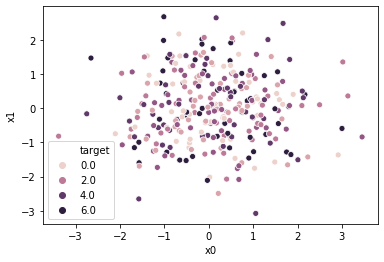

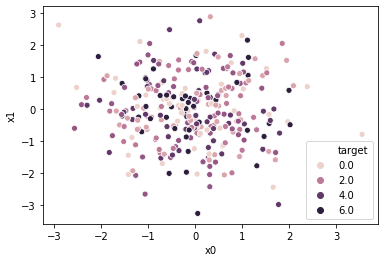

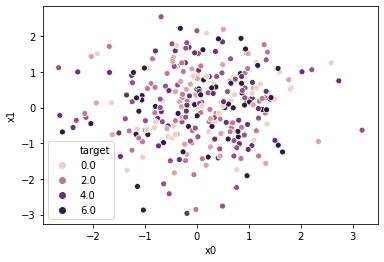

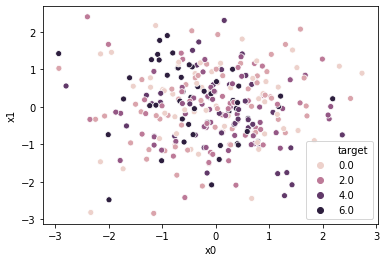

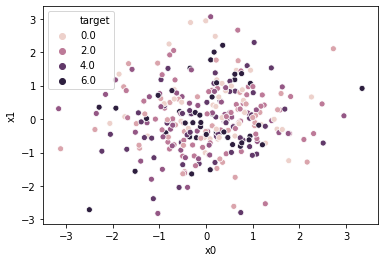

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from random import randint    
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import math as m
import numpy as np

# Divide em variaveis de treino e teste
def SplitTrainTest_kfold(class02Att, class02Res, nloop, niter):
  test_size = 1.0/n_iter
  # Definindo o inicio e tamanho do teste
  inicio = m.floor(class02Att.shape[0] * test_size) * nloop
  if(nloop + 1 < niter):
    tamanho = m.floor(class02Att.shape[0] * test_size)    
  else:  
    tamanho = class02Att.shape[0] - (nloop - 1) * m.floor(class02Att.shape[0] * test_size) 
  # x% = 1/n_iter vai para a variavel teste
  X_test = class02Att.iloc[inicio:inicio + tamanho, 1:class02Att.columns.size]
  Y_test = class02Res.iloc[inicio:inicio + tamanho]['target']
  # Resto vai para a variavel treino
  X_train = class02Att[(class02Att['index'] < inicio) | (class02Att['index'] >= inicio + tamanho)]
  X_train = X_train.iloc[:, 1:X_train.columns.size]
  Y_train = class02Res[(class02Res['index'] < inicio) | (class02Res['index'] >= inicio + tamanho)]['target']
  return X_train, X_test, Y_train, Y_test 

def ScatterPlot(Att1, Att2, X_test, Y_test, nplot):
  Total_Data = X_test.join(Y_test, how='outer') 
  plt.figure(nplot)
  sns.scatterplot(
      x=Att1,
      y=Att2,
      hue = Total_Data.columns[Total_Data.columns.size - 1],
      data=Total_Data
  )

def KNN(neigh, tipo, X_train, Y_train, Att1, Att2, nplot):
  # type can be 'euclidean' and neigh is n of KNN
  # Att1 and Att2 are names from columns ex: 'x0','x1'
  knn = KNeighborsClassifier(n_neighbors=neigh, metric=tipo)
  knn.fit(X_train, Y_train)
  y_pred = knn.predict(X_test)
  ScatterPlot(Att1,Att2,X_test, Y_test, nplot)
  return y_pred 

n_iter = 5
kf = KFold(n_splits=5)
# tmp + 1 is number of plots
acuracia = []
# Atributos
class02Att = class02.iloc[:, 0:class02.columns.size - 1].reset_index().sort_values(by = 'index')
# Target
class02Res = class02.iloc[:, class02.columns.size - 1].reset_index().sort_values(by = 'index')
for tmp in range(0,n_iter):
  X_train, X_test, Y_train, Y_test = SplitTrainTest_kfold(class02Att, class02Res, tmp, n_iter)
  y_pred = KNN(10, 'euclidean', X_train, Y_train, 'x0','x1', tmp + 1)
  ConfusionM = confusion_matrix(Y_test, y_pred)
  print(ConfusionM)
  print("Acuracia: %d / %d = %f" %(ConfusionM.trace(), ConfusionM.sum(), ConfusionM.trace()/ConfusionM.sum()))
  acuracia.append(ConfusionM.trace()/ConfusionM.sum())
media = np.array(acuracia)
print(media.mean())

In [111]:
print("Dimensao dos Targets")
print(class02Res.shape) 
print("Dimensao dos atributos:")
print(class02Att.shape) 
print("Dimensao do atributo treino" )
print(X_train.shape) 
print("Dimensao do target do treino")
print(Y_train.shape) 
print("Dimensao do atributo teste" )
print(X_test.shape) 
print("Dimensao do atributo teste")
print(Y_test.shape) 

Dimensao dos Targets
(1500, 2)
Dimensao dos atributos:
(1500, 101)
Dimensao do atributo treino
(1200, 100)
Dimensao do target do treino
(1200,)
Dimensao do atributo teste
(300, 100)
Dimensao do atributo teste
(300,)



#LASSO - Questão 3


In [116]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

def OneOut(class02Att, class02Res, index):
    # Atributos Teste
    X_test = class02Att[(class02Att['index'] == index)]
    X_test = X_test.iloc[:, 1:X_test.columns.size]                              # Retirando variavel index de treino

    # Target Teste
    Y_test = class02Res[(class02Res['index'] == index)]
    Y_test = Y_test.iloc[:, 1:Y_test.columns.size]                              # Retirando variavel index de treino
    
    # Resto vai para a variavel treino
    X_train = class02Att[(class02Att['index'] != index)]
    X_train = X_train.iloc[:, 1:X_train.columns.size]                           # Retirando variavel index de treino

    Y_train = class02Res[(class02Res['index'] != index)]
    Y_train = Y_train.iloc[:, 1:Y_train.columns.size]                           # Retirando variavel index de treino
    return X_train, X_test, Y_train, Y_test 

# Atributos
reg01Att = reg01.iloc[:, 0:reg01.columns.size - 1].reset_index().sort_values(by = 'index')
# Target
reg01Res = reg01.iloc[:, reg01.columns.size - 1].reset_index().sort_values(by = 'index')
# Aplicando Leave-One-Out
niterate = reg01Att.shape[0]
mse_train = []
mse_test = []
for tmp in range(0,niterate):
  [X_train, X_test, Y_train, Y_test] = OneOut(reg01Att, reg01Res, tmp)
  lasso = Lasso(alpha=0.1)
  lasso.fit(X_train, Y_train)
  y_pred = lasso.predict(X_test)
  mse_test.append(mean_squared_error(Y_test,y_pred))

  y_pred = lasso.predict(X_train)
  mse_train.append(mean_squared_error(Y_train,y_pred))

# Escolhendo a melhor resposta obtida pelo Leave-One-Out 
bestChoice_test = min(mse_test)
n_pos = mse_test.index(bestChoice_test) # pega a posição do valor n_min
bestChoice_train = mse_train[n_pos]

print("O RMSE da base de treino %f" % bestChoice_train)
print("O RMSE da base de teste %f" % bestChoice_test)
#plt.figure(1)
#plt.plot(mse_test)


O RMSE da base de treino 368.195343
O RMSE da base de teste 0.000026


# Árvore de Regressão - Questão 4

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Atributos
reg02Att = reg02.iloc[:, 0:reg02.columns.size - 1].reset_index().sort_values(by = 'index')
# Target
reg02Res = reg02.iloc[:, reg02.columns.size - 1].reset_index().sort_values(by = 'index')
n_iter = 5
mae_train = []
mae_test = []
for tmp in range(0,n_iter):
  X_train, X_test, Y_train, Y_test = SplitTrainTest_kfold(reg02Att, reg02Res, tmp, n_iter)
  # Fit regression model
  regr_1 = DecisionTreeRegressor(max_depth=5)
  regr_1.fit(X_train, Y_train)

  y_pred = regr_1.predict(X_test)
  mae_test.append(mean_absolute_error(Y_test, y_pred))

  y_pred = regr_1.predict(X_train)
  mae_train.append(mean_absolute_error(Y_train, y_pred))
print(mae_test)
print(mae_train)
avg_test = np.array(mae_test)
avg_train = np.array(mae_train) 
print("A media dos erros com base nos dados de teste e de: %f" %avg_test.mean())
print("A media dos erros com base nos dados de treino e de: %f" % avg_train.mean())

[57.098737035690036, 62.79790693619407, 63.4169663668354, 55.55980882438029, 57.71069549074349]
[42.59900459735443, 41.459602664675785, 43.183122845959154, 41.45888036201756, 41.397792739872976]
A media dos erros com base nos dados de teste e de: 59.316823
A media dos erros com base nos dados de treino e de: 42.019681
